<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Understanding</a></span><ul class="toc-item"><li><span><a href="#Correlation-of-Features" data-toc-modified-id="Correlation-of-Features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Correlation of Features</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Normalization" data-toc-modified-id="Normalization-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Normalization</a></span><ul class="toc-item"><li><span><a href="#Class-Imbalance:-Over-Sampling" data-toc-modified-id="Class-Imbalance:-Over-Sampling-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Class Imbalance: Over Sampling</a></span></li><li><span><a href="#Class-Imbalance:-Class-Weight" data-toc-modified-id="Class-Imbalance:-Class-Weight-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Class Imbalance: Class Weight</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Hyperparametrization:-Regularization" data-toc-modified-id="Hyperparametrization:-Regularization-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Hyperparametrization: Regularization</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Cross Validation</a></span></li></ul></li><li><span><a href="#K-Nearest-Neighbor" data-toc-modified-id="K-Nearest-Neighbor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>K Nearest Neighbor</a></span><ul class="toc-item"><li><span><a href="#Hyperparametrization:-Best-n_neighbors" data-toc-modified-id="Hyperparametrization:-Best-n_neighbors-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Hyperparametrization: Best <code>n_neighbors</code></a></span></li></ul></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Support Vector Machine</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Baseline Model</a></span></li></ul></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-Boost" data-toc-modified-id="Gradient-Boost-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Gradient Boost</a></span><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Final Model</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Model-Performance" data-toc-modified-id="Model-Performance-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Performance</a></span></li><li><span><a href="#ML-Pipeline" data-toc-modified-id="ML-Pipeline-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>ML Pipeline</a></span></li><li><span><a href="#SHAP-Values" data-toc-modified-id="SHAP-Values-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>SHAP Values</a></span></li></ul></li></ul></div>

# Business Understanding

In [45]:
# ! pip install catboost
# ! pip install shap 

# Data Understanding

In [46]:
# Import important libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.express as px
from bs4 import BeautifulSoup
import requests
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
from sklearn.metrics import log_loss,roc_curve,auc,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost.sklearn import XGBClassifier 
from catboost import Pool, CatBoostClassifier
import shap 

# Enable inline ploting
%matplotlib inline 


In [47]:
# Import data
df = pd.read_csv('data/travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


Before moving on, it is best to adjust the column names and substitute spaces with `_` and have all columns in lower cases for good measure. In addition, one column has a bracket, which can also lead to an inconvenience. The following code block handles those issue. 

In [48]:
df.columns = [s[:s.find('(')] if '(' in s else s for s in df.columns]
df.columns = ['_'.join(s.lower().split()) for s in df.columns]

We can use `.info()` to understand the type and completeness of the data provided. 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                63326 non-null  object 
 1   agency_type           63326 non-null  object 
 2   distribution_channel  63326 non-null  object 
 3   product_name          63326 non-null  object 
 4   claim                 63326 non-null  object 
 5   duration              63326 non-null  int64  
 6   destination           63326 non-null  object 
 7   net_sales             63326 non-null  float64
 8   commision             63326 non-null  float64
 9   gender                18219 non-null  object 
 10  age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [50]:
df.describe()

,duration,net_sales,commision,age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [51]:

df.drop(df[df.duration<0].index, inplace=True)

df.drop(df[df.net_sales<0].index, inplace=True)

df.shape

(62643, 11)

In [52]:
df.describe()

,duration,net_sales,commision,age
count,62643.000000,62643.000000,62643.000000,62643.000000
mean,48.960921,41.803969,9.655532,39.957202
std,101.929382,47.635665,19.668634,13.984385
min,0.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,27.000000,0.000000,36.000000
75%,52.000000,49.000000,10.640000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Now, this is more workable setting. Before moving on, it is clear that `gender` has `NaN` value. The following code isolates the column.

In [53]:
na_cols = df.loc[df.isnull().any(axis=1),
                          df.columns[df.isnull().any()]].columns
na_cols

Index(['gender'], dtype='object')

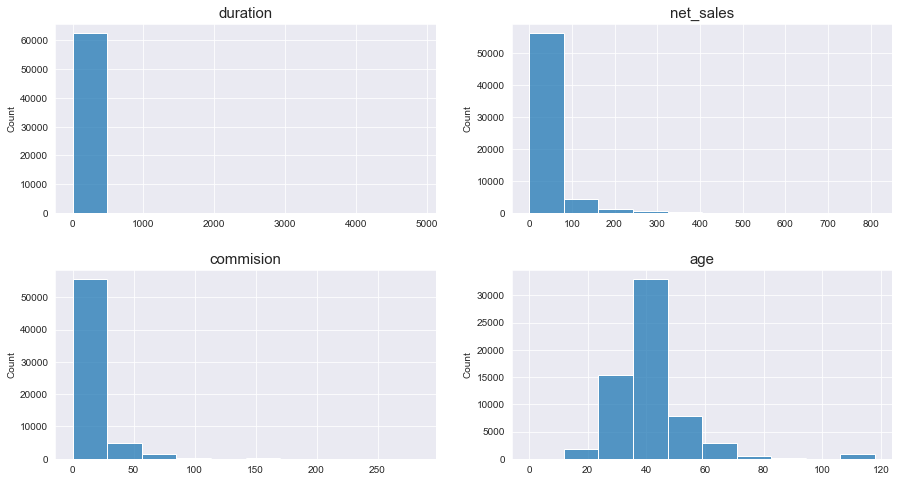

In [54]:
# Set seaborn style 
sns.set_style('darkgrid')

# Select numeric columns from the dataframe 
numerics = ['int64', 'float64']
num_cols = df.select_dtypes(include=numerics).columns

# Plot the distribution of numeric columns
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
for ax, col in zip(axes.flatten(),num_cols):
    sns.histplot(df[col], 
                 color='tab:blue',ax=ax,bins=10).set_title(col,fontsize=15)
    # Hide xlabel
    ax.set_xlabel('')

# Adjust vertical spacing between subplots 
plt.subplots_adjust(hspace = 0.3);

# Save plot
#plt.savefig('images/features_hist.png')

In [55]:
# Helper function to convert pandas series to dataframe 
def series_2_dataframe(s, cols):
    # Create a dataframe and reset index
    s = pd.DataFrame(s).reset_index()    
    # Rename columns and return dataframe 
    s.columns = cols    
    return s

Based on a cursory look at the structure of the dataset, it is possible to identify some columns that can have binary entries, such as `claim` and `distribution_channel`. Let's see which other column(s) have only two unique values.   

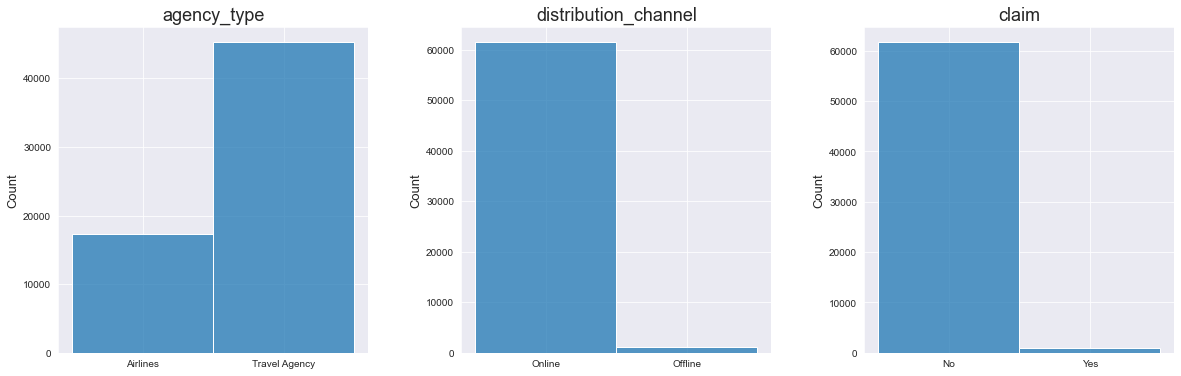

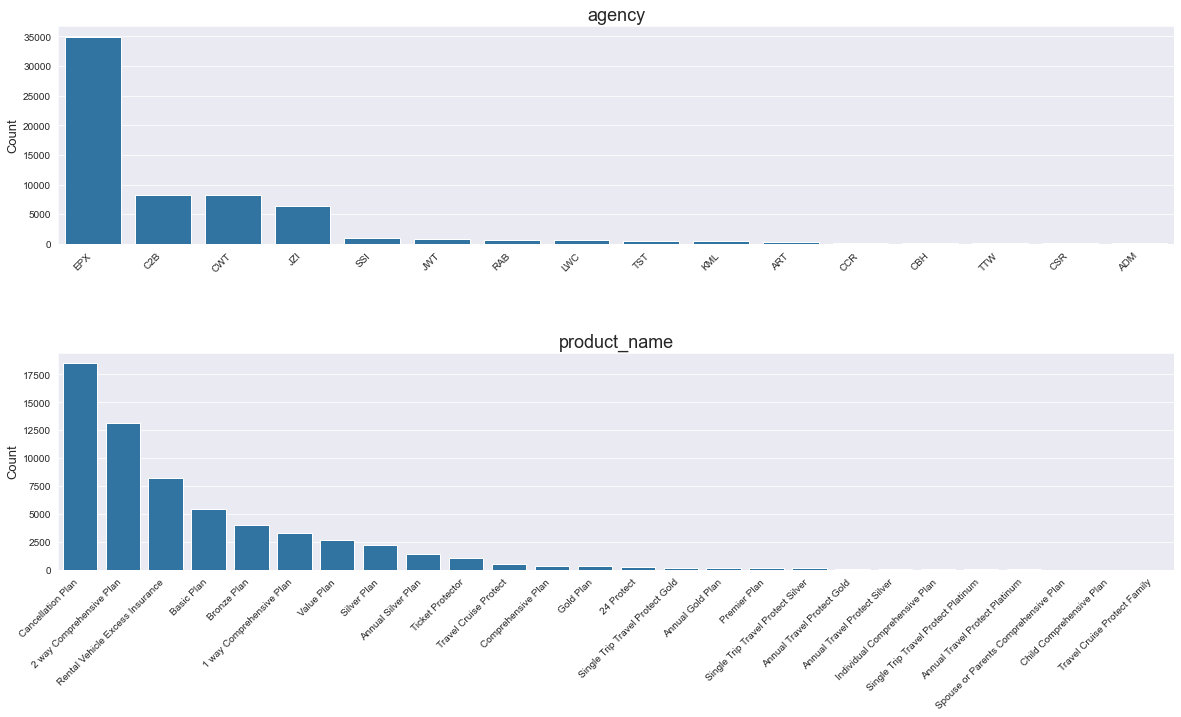

In [56]:
# Create a dataframe with the number of unique values in each column of df   
unique_df = series_2_dataframe(df.nunique(),['column','unique_vals'])

# Select columns with binary choices
bin_cat_cols = unique_df[unique_df.unique_vals==2]['column']

# Exclude columns with NaN values
bin_cat_cols = [col for col in bin_cat_cols if col!=na_cols]

# Plot the distribution of binary columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, col in zip(axes.flatten(), bin_cat_cols):
    # Create a histogram 
    g = sns.histplot(df[col], ax=ax, color='tab:blue')
        
    # Set title, font size, remove xlable and set ylabel as 'Count' 
    g.set_title(col, fontsize=18)
    g.set_xlabel('')
    g.set_ylabel('Count',fontsize=13)    

# Set the width between plots 
plt.subplots_adjust(wspace = 0.3);    

# Find catagorical columns that are not in either numerical and binary columns
non_bin_cat_cols = [col for col in df.columns if col not in bin_cat_cols and col not in num_cols]

# Exclude columns with NaN values
non_bin_cat_cols = [col for col in non_bin_cat_cols if col!=na_cols]

# Plot the distribution of catafgorical with more than two unique values 
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
for ax, col in zip(axes.flatten(), non_bin_cat_cols):
    # Preprocessing stage
    # Create a count dataframe for an easier plot in bar graph 
    # instead of histogram  
    tmp_df = series_2_dataframe(df[col].value_counts(), [col, 'Count'])
    
    # Create a bar graph 
    g = sns.barplot(x=col, y='Count',data=tmp_df, ax=ax, color='tab:blue')
        
    # Set title, font size, remove xlable and set ylabel as 'Count' 
    g.set_title(col, fontsize=18)
    g.set_xlabel('')
    g.set_ylabel('Count',fontsize=13)
    
    # Rotate xtick labels for readability
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace = 0.5);

# Save plot
#plt.savefig('images/features_hist.png')

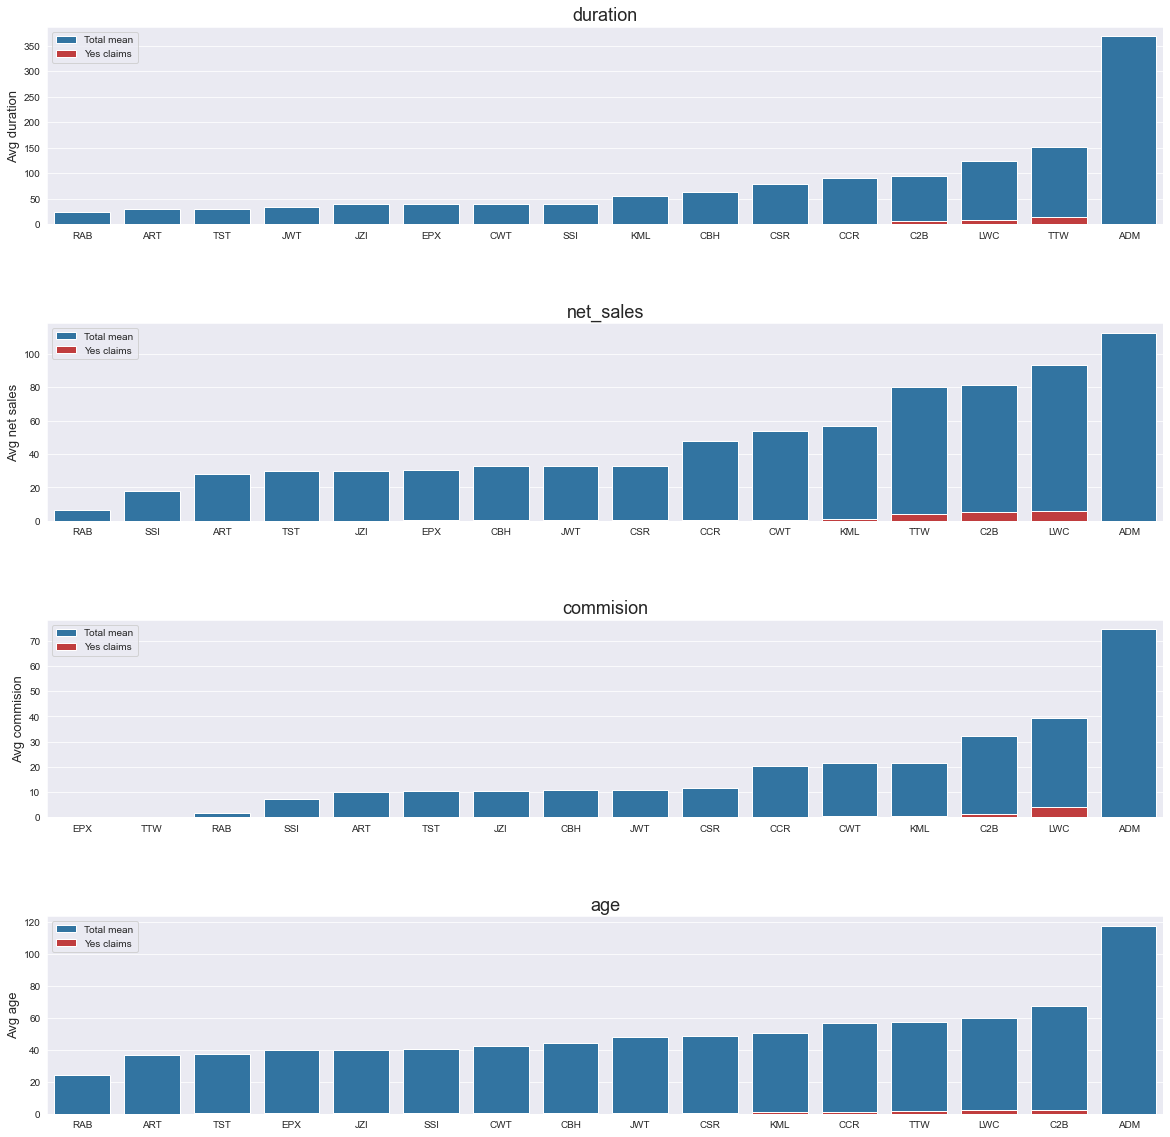

In [57]:
# Averages of numeric columns
mean_df = df.groupby('agency').mean()

# Find yes claims in the groups 
yes_df = df[df.claim=='Yes'].groupby('agency').count()

# Select columns in 'yes_df'
yes_df = yes_df[mean_df.columns]

# Calculate the ratio of 'yes' claims to total
total_df = df.groupby('agency').count()[mean_df.columns]
mean_yes_df = mean_df*yes_df/total_df 


# Plot the distribution of categorical with more than two unique values 
fig, axes = plt.subplots(4, 1, figsize=(20, 20))

for ax, col in zip(axes.flatten(), mean_df):
    # Preprocessing stage
    # Create a count dataframe for an easier plot in bar graph 
    # instead of histogram 
    value = 'Avg ' + ' '.join(col.split('_'))
    
    tmp_df = series_2_dataframe(mean_df[col], 
                                ['Agency', value]).sort_values(by=value)
    
    # Create a bar graph 
    g = sns.barplot(x='Agency', y=value, data=tmp_df, ax=ax, color='tab:blue',
                    label='Total mean')
    
    tmp_df = series_2_dataframe(mean_yes_df[col], 
                                ['Agency', value]).sort_values(by=value)
    
    # Create a bar graph 
    g = sns.barplot(x='Agency', y=value, data=tmp_df, ax=ax, color='tab:red',
                    label='Yes claims')
    
        
    # Set title, font size, remove xlable and set ylabel as 'Count' 
    g.set_title(col, fontsize=18)
    g.set_xlabel('')
    g.set_ylabel(value,fontsize=13)
    g.legend()
    
# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace = 0.5);


In [58]:
# Find the frequency with the destination countries 
destin = series_2_dataframe(df.destination.value_counts(), 
                 ['Destination','frequency'])      

# Change format of country names using title 
destin.Destination = destin.Destination.apply(lambda x: x.title())
destin.head()

,Destination,frequency
0,Singapore,13177
1,Malaysia,5876
2,Thailand,5856
3,China,4766
4,Australia,3579


In [59]:
# Create a choropleth map with Plotly. 
# Notice that 'Singapore' is skipped since it has the highest count
# Also, the country could not be displayed due to its size 
fig = px.choropleth(destin.iloc[1:,:], locations="Destination", 
                    locationmode="country names", color='frequency',                    
                    color_continuous_scale="algae",
                    labels={'frequency':'Frequency'}, 
                    projection="natural earth"                    
                   )

# Control margins for maximum display
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

## Correlation of Features

In order to plot the correlation of features, the dataframe is copied and the categorical data is converted to numerical (not one-hot-encoding) to show the values of correlation.  

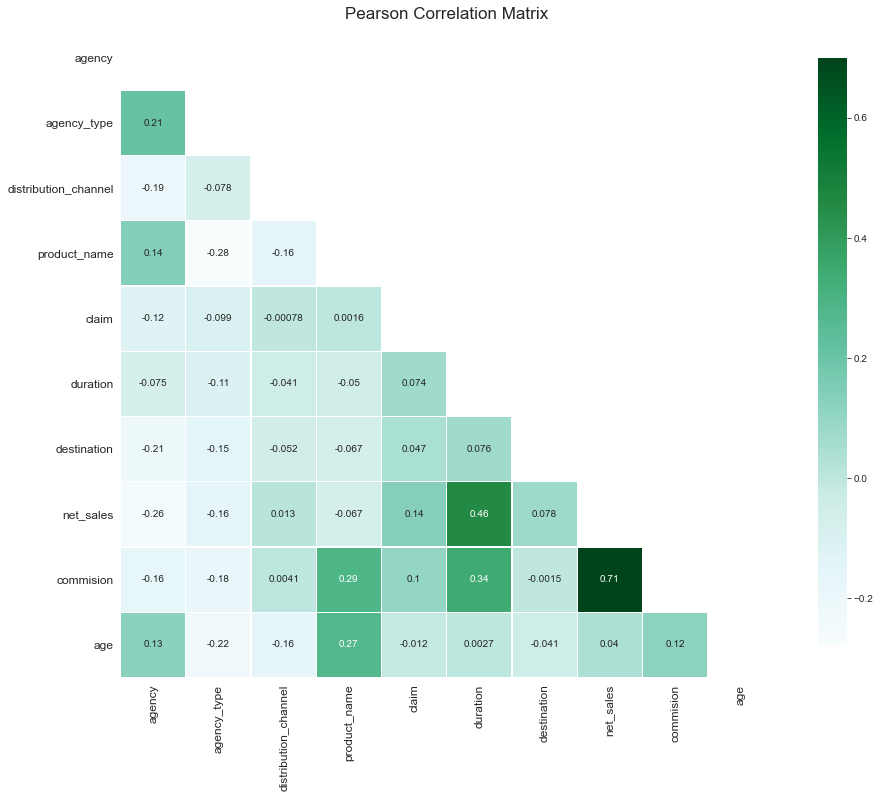

In [60]:
# Change seaborn style 
sns.set_style('white')

# Copy df with 'gender' column dropped
dum_df = df.drop('gender', axis=1)

# Iterate through categorical columns and perform label encoding
for col in (non_bin_cat_cols+bin_cat_cols):
    dum_df[col] = LabelEncoder().fit_transform(dum_df[col])

# Select features for correlation analysis    
features = dum_df.columns

# Create a triangular mask to show the lower triangular section of the heatmap
mask = np.zeros_like(dum_df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

# Initialize plot
fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=17)

# Plot the Pearson Correlation Matrix for the numeric columns
sns.heatmap(dum_df[features].corr(),linewidths=0.25,vmax=0.7,square=True,
            cmap="BuGn",linecolor='w',annot=True,annot_kws={"size":10},
            mask=mask,cbar_kws={"shrink": .9},ax=ax);

# Adjust font size of ticks 
ax.set_xticklabels(ax.get_xmajorticklabels(),fontsize=12);
ax.set_yticklabels(ax.get_ymajorticklabels(),fontsize=12);

# Save plot 
#plt.savefig('images/corr.png')

# Data Preparation

In [61]:
print(df.gender.value_counts())
print('Undefined gender values: ',df.gender.isna().sum())

M    9299
F    8812
Name: gender, dtype: int64
Undefined gender values:  44532


In [62]:
df_mod = df.drop('gender',axis=1)
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62643 entries, 21 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                62643 non-null  object 
 1   agency_type           62643 non-null  object 
 2   distribution_channel  62643 non-null  object 
 3   product_name          62643 non-null  object 
 4   claim                 62643 non-null  object 
 5   duration              62643 non-null  int64  
 6   destination           62643 non-null  object 
 7   net_sales             62643 non-null  float64
 8   commision             62643 non-null  float64
 9   age                   62643 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 5.3+ MB


In [63]:
'''Visualization stage here!'''

'Visualization stage here!'

In order to proceed to the next step, we need to visualize the data in each column first. 

In [64]:
df_mod.claim.value_counts()

No     61719
Yes      924
Name: claim, dtype: int64

In [65]:
df_mod.claim = (df_mod.claim=='Yes').astype(int)

In [66]:
df_dummy = pd.get_dummies(df_mod,drop_first=True)
df_dummy.shape

(62643, 194)

In [67]:
URL = "https://simple.wikipedia.org/wiki/List_of_countries_by_continents"

html_page = requests.get(URL)
soup = BeautifulSoup(html_page.content, 'html.parser') 

cont_names  = soup.find_all("span",{"class": "mw-headline"})
count_name = soup.find_all("ol")
continents = []

for cont in cont_names:
    name = cont.get_text()
    if ('References' not in name) and ('website' not in name) and ('Antarctica' not in name):
        continents.append(name)

continent_dict = {}        
for i in range(len(continents)+1):    
    count_list = count_name[i].find_all("li")
    for country in count_list:
        country = country.get_text()
        country = country.split(' - ')[0].strip()
        country = country.split('(')[0].strip()
        country = country.split('*')[0].strip()
        country = country.split('[')[0].strip()
        if i<len(continents):
            continent_dict[country] = continents[i]
        else: 
            continent_dict[country] = continents[-1]

In [68]:
def modify_name(s):
    return s.title().replace(' And ',' and ').replace(' Of ',' of ').split(',')[0]
    

df_mod.destination = df_mod.destination.apply(modify_name)
df_mod['continent'] = df_mod.destination.map(continent_dict)
df_mod['continent'].value_counts()

Asia                         43326
Europe                        4846
Oceania                       4136
North and Central America      565
Africa                         286
South America                  198
Name: continent, dtype: int64

In [69]:
df_mod[df_mod.continent.isna()]['destination'].value_counts()

United States                       2486
Hong Kong                           2404
Viet Nam                            1665
Korea                               1465
Brunei Darussalam                    777
Lao People'S Democratic Republic     149
Ireland                              120
Macao                                110
Russian Federation                    79
Guam                                   8
Macedonia                              3
Faroe Islands                          3
Bermuda                                3
Reunion                                2
French Polynesia                       2
Cayman Islands                         2
Northern Mariana Islands               2
Republic of Montenegro                 1
Virgin Islands                         1
Barbados                               1
Turks and Caicos Islands               1
Tibet                                  1
Libyan Arab Jamahiriya                 1
Name: destination, dtype: int64

In [70]:
north_central_america = ['United States', 'Cayman Islands', 'Barbados', 
                 'Turks and Caicos Islands', 'Bermuda', 'Virgin Islands']
africa = ['Libyan Arab Jamahiriya', 'Reunion']
europe = ['Ireland', 'Macedonia', 'Republic of Montenegro', 'Faroe Islands']
oceania = ['Guam', 'Northern Mariana Islands', 'French Polynesia']

cont_list = [north_central_america, africa, europe, oceania]
cont_name = ['North and Central America', 'Africa', 'Europe', 'Oceania']
for i, cont in enumerate(cont_list):
    for name in cont:
        df_mod.loc[df_mod.destination==name,'continent'] = cont_name[i]
df_mod.loc[df_mod.continent.isna(),'continent'] = 'Asia'
df_mod.continent = df_mod.continent.apply(lambda x: x.lower().replace(' ','_'))

In [40]:
destination = df_mod.destination

df_mod.drop('destination',axis=1,inplace=True)

df_dummy = pd.get_dummies(df_mod,drop_first=True)
df_dummy.shape

(62643, 52)

# Modeling

In [71]:
models = {}

In [72]:
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 8


## Normalization 

In [73]:
X = df_dummy.drop('claim', axis=1)
y = df_dummy.claim

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, 
                                                    test_size = 0.3,
                                                    stratify=y)

y_train.value_counts()

0    43203
1      647
Name: claim, dtype: int64

In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Class Imbalance: Over Sampling

In [77]:

smote = SMOTE(random_state=123)

X_train_resam_smote, y_train_resam_smote = smote.fit_resample(X_train_scaled, y_train) 

y_train_resam_smote.value_counts(normalize=True)

1    0.5
0    0.5
Name: claim, dtype: float64

In [78]:

adasyn = ADASYN(random_state=123)

X_train_resam_ada, y_train_resam_ada = adasyn.fit_resample(X_train_scaled, y_train) 

y_train_resam_ada.value_counts(normalize=True)

1    0.500641
0    0.499359
Name: claim, dtype: float64

In [79]:

rand_ov_sam = RandomOverSampler(random_state=123)

X_train_resam_rand, y_train_resam_rand = rand_ov_sam.fit_resample(X_train_scaled, y_train) 

y_train_resam_rand.value_counts(normalize=True)

1    0.5
0    0.5
Name: claim, dtype: float64

### Class Imbalance: Class Weight

In [80]:


class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(y_train),
                                     y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.5074879059324584, 1: 33.887171561051005}

## Logistic Regression 

In [ ]:
log_reg = {}

In [ ]:
logreg = LogisticRegression(n_jobs=n_cpu-1)
cross_val_score(logreg, X_train_resam_smote, y_train_resam_smote)
logreg = GridSearchCV(logreg, param_grid=logreg_param_grid, cv=5)
logreg_cv.fit(X_train_resampled, y_train_resampled)
logreg_best = logreg_cv.best_estimator_
logreg_best

In [ ]:
logreg_param_grid = {'C':np.linspace(0.1, 1, 10), 
                     'fit_intercept':[False, True]}

In [ ]:
logreg = LogisticRegression(n_jobs=n_cpu-1)

logreg_cv = GridSearchCV(logreg, param_grid=logreg_param_grid, cv=5)
logreg_cv.fit(X_train_resampled, y_train_resampled)
logreg_best = logreg_cv.best_estimator_
logreg_best

In [ ]:
pred = logreg_best.predict(X_test_scaled)
accuracy_score(y_test, pred)

In [ ]:
logreg = LogisticRegression(n_jobs=n_cpu-1, class_weight=class_weights)
logreg_cv = GridSearchCV(logreg, param_grid=logreg_param_grid, cv=5)
logreg_cv.fit(X_train_scaled, y_train)
logreg_best = logreg_cv.best_estimator_
logreg_best

In [ ]:
pred = logreg_best.predict(X_test_scaled)
accuracy_score(y_test, pred)


In [ ]:
str(logreg_cv.estimator)

### Hyperparametrization: Regularization 

### Cross Validation 

## K Nearest Neighbor

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=50, n_jobs=n_cpu-1)

# Fit the classifier
knn_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
preds = knn_clf.predict(X_test_scaled)

print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(f1_score(y_test, pred))

### Hyperparametrization: Best `n_neighbors`

## Support Vector Machine

### Baseline Model

In [ ]:
svc_clf = SVC(class_weight=class_weights, probability=False)
svc_clf.fit(X_train_scaled, y_train)
preds = svc_clf.predict(X_test_scaled)

accuracy_score(y_test, pred)

## Decision Tree

## Random Forest

## Gradient Boost 

### XGBoost 

### CatBoost

## Grid Search 

## Final Model

# Evaluation

## Model Performance

## SHAP Values